# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Miftahul Khaira
- **Email:** mikhaira04@gmail.com
- **ID Dicoding:** miftahul_khaira_XoO9

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan musim memengaruhi minat penyewaan sepeda?
- Bagaimana tingkat penyewaan sepeda setiap bulannya selama dua tahun?
- Bagaimana tingkat penyewaan sepeda dalam 24 jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Load dataset yang dibutuhkan dalam proses analisis data ke dalam notebook
- Menampilkan lima baris teratas

### Assessing Data

Menilai tabel

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**

*   Pengecekan tipe data untuk setiap atribut dataframe agar dapat ditentukan apa langkah selanjutnya
*   Pengecekan jumlah data kosong pada setiap atribut dataframe dan hasilnya tidak terdapat data kosong
*   Tidak ditemukan data duplikat dalam dataframe
*   Menggunakan fungsi describe() untuk menampilkan deskripsi statistik dari dataframe





### Cleaning Data

Memperbaiki tipe data

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**insight:**
- Mengubah tipe data atribut dteday dari string menjadi datetime agar  dapat digunakan dalam manipulasi data seperti pengurutan, pengelompokkan, dan filtering berdasarkan tanggal

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [10]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10142,10143,2012-03-03,1,1,3,16,0,6,0,1,0.50,0.4848,0.27,0.2985,167,300,467
4894,4895,2011-07-27,3,0,7,20,0,3,1,1,0.76,0.6818,0.45,0.2239,55,239,294
12026,12027,2012-05-21,2,1,5,7,0,1,1,3,0.56,0.5303,0.88,0.2985,7,146,153
8045,8046,2011-12-06,4,0,12,21,0,2,1,2,0.44,0.4394,1.00,0.1940,6,108,114
10412,10413,2012-03-14,1,1,3,23,0,3,1,1,0.56,0.5303,0.43,0.1642,19,72,91


In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [12]:
hour_df.dteday.is_unique

False

In [13]:
hour_df.instant.is_unique

True

In [14]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
}).sort_values(by=('cnt','sum'), ascending=False)

instant  cnt                                     
       nunique  max min        mean         std      sum
season                                                  
3         4496  977   1  236.016237  197.711630  1061129
2         4409  957   1  208.344069  188.362473   918589
4         4232  967   1  198.868856  182.967972   841613
1         4242  801   1  111.114569  119.224010   471348

In [15]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "registered": "sum",
    "casual": "sum",
    "temp":  ["min", "max"],
    "atemp":  ["min", "max"],
    "hum":  ["min", "max"],
    "windspeed":  ["min", "max"]
}).sort_values(by=('registered','sum'), ascending=False)

instant registered  casual  temp         atemp           hum       \
       nunique        sum     sum   min   max     min     max   min  max   
season                                                                     
3         4496     835038  226091  0.38  1.00  0.2424  1.0000  0.16  1.0   
2         4409     715067  203522  0.16  0.94  0.1667  0.8788  0.16  1.0   
4         4232     711831  129782  0.14  0.76  0.1515  0.6818  0.16  1.0   
1         4242     410726   60622  0.02  0.72  0.0000  0.6515  0.00  1.0   

       windspeed          
             min     max  
season                    
3            0.0  0.8507  
2            0.0  0.7164  
4            0.0  0.6418  
1            0.0  0.8060

In [16]:
hour_df.groupby(by="workingday").instant.count()

,instant
workingday,
0,5514
1,11865


In [17]:
hour_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std","sum" ]
}).sort_values(by=('instant','nunique'), ascending=False)

instant  cnt                                     
           nunique  max min        mean         std      sum
workingday                                                  
1            11865  977   1  193.207754  185.107477  2292410
0             5514  783   1  181.405332  172.853832  1000269

In [18]:
hour_df.groupby(by="workingday").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
    "instant": "nunique",
}).sort_values(by='cnt', ascending=False)

,registered,casual,cnt,instant
workingday,,,,
1,1989125,303285,2292410,11865
0,683537,316732,1000269,5514


In [19]:
hour_df[(hour_df.workingday == 0) & (hour_df.holiday == 1)].instant.count()

500

In [20]:
hour_df.groupby(by="holiday").instant.count()

,instant
holiday,
0,16879
1,500


In [21]:
hour_df.groupby(by="yr").agg({
    "instant": "nunique",
    "registered": "sum",
    "casual": "sum",
}).sort_values(by='instant', ascending=False)

,instant,registered,casual
yr,,,
1,8734,1676811,372765
0,8645,995851,247252


In [22]:
filtered_df = hour_df[hour_df["yr"] == 1]

In [23]:
filtered_df.groupby(by="mnth").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
}).sort_values(by='cnt', ascending=False)

,registered,casual,cnt
mnth,,,
9,174795,43778,218573
8,171306,43197,214503
7,161902,41705,203607
6,159536,43294,202830
10,164303,34538,198841
5,151630,44235,195865
4,135768,38456,174224
3,133257,31618,164875
11,131655,21009,152664


In [24]:
filtered_df.groupby(by="hr").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
}).sort_values(by='cnt', ascending=False)

,registered,casual,cnt
hr,,,
17,176481,32747,209228
18,166357,26430,192787
8,156742,8792,165534
16,109031,33095,142126
19,120007,20980,140987
13,83019,32561,115580
12,84504,30712,115216
15,80816,33743,114559
14,75178,33992,109170


In [25]:
split_df = hour_df[hour_df["yr"] == 0]

In [26]:
split_df.groupby(by="mnth").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
}).sort_values(by='cnt', ascending=False)

,registered,casual,cnt
mnth,,,
6,112900,30612,143512
7,104889,36452,141341
8,107849,28842,136691
5,104771,31050,135821
9,100873,26545,127418
10,98289,25222,123511
11,86573,15594,102167
4,72524,22346,94870
12,78875,8448,87323


In [27]:
split_df.groupby(by="hr").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
}).sort_values(by='cnt', ascending=False)

,registered,casual,cnt
hr,,,
17,106159,21473,127632
18,98919,18066,116985
8,88498,6969,95467
19,71277,14525,85802
16,64883,20739,85622
13,49187,20152,69339
12,50192,19006,69198
15,47727,20863,68590
14,45385,21097,66482


In [28]:
hour_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": "sum",
}).sort_values(by='cnt', ascending=False)

,instant,cnt
yr,,
1,8734,2049576
0,8645,1243103


**Insight:**
- Tanggal dan instant pada dataframe bersifat unique,tidak terdapat duplikat
- Penyewaan sepeda paling banyak terjadi pada musim gugur, diikuti oleh musim panas, musim dingin, dan musim semi.
- Walaupun masa sewa sepeda pada musim semi lebih lama dibanding musim dingin namun jumlah sewa pada musim dingin jauh lebih banyak dibanding musim semi
- Jumlah sewa sepeda pada musim semi tidak sampai setengah dari sepeda pada musim gugur, perbedaan yang signifikan ini boleh jadi disebabkan oleh factor lingkungan
- Jumlah sewa sepeda pada masa kerja jauh lebih banyak dibanding masa liburan, mungkin ini disebabkan karena lebih banyak jumlah working day dibanding dengan holiday namun jumlah  penyewa casual pada holiday lebih tinggi dibanding saat workingday. Bisa diambil kesimpulan bahwa pengguna yang terdaftar sebagian besar merupakan mahasiswa/karyawan/pekerja yang menggunakan sepeda sebagai transportasi untuk mengantarkan mereka ke tujuan pada saat working day.
- Pada saat holiday jumlah penyewa casual mengalami peningkatan dibandingka saat working day
- Sehubungan dengan hari kerja, Waktu penyewaan sepeda terbanyak pun juga terjadi disaat jam pergi dan pulang kerja
- Jumlah penyewa sepeda pada tahun 2012 mengalami peningkatan sebesar 64,9% dibanding tahun sebelumnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan musim memengaruhi minat penyewaan sepeda?

In [29]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
byseason_df = hour_df.groupby(by="season").cnt.sum().reset_index()
byseason_df['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}, inplace=True)
byseason_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
byseason_df

,season,customer_count
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


<ipython-input-31-d408769e1f64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


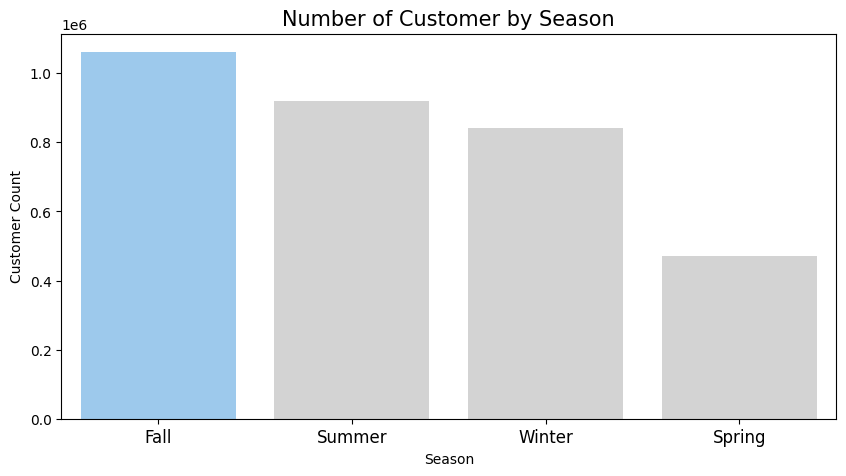

In [31]:
plt.figure(figsize=(10, 5))

color_ = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=color_

)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel("Customer Count")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana tingkat penyewaan sepeda setiap bulannya dalam dua tahun?


In [32]:
bymonth_df = filtered_df.groupby(by="mnth").cnt.sum().reset_index()
bymonth_df['mnth'].replace({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}, inplace=True)
bymonth_df.rename(columns={
    "cnt": "customer_count",
     "mnth": "month",
}, inplace=True)
bymonth_df

,month,customer_count
0,Januari,96744
1,Februari,103137
2,Maret,164875
3,April,174224
4,Mei,195865
5,Juni,202830
6,Juli,203607
7,Agustus,214503
8,September,218573
9,Oktober,198841


In [33]:
month_df = split_df.groupby(by="mnth").cnt.sum().reset_index()
month_df['mnth'].replace({
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}, inplace=True)
month_df.rename(columns={
    "cnt": "customer_count",
     "mnth": "month",
}, inplace=True)
month_df

,month,customer_count
0,Januari,38189
1,Februari,48215
2,Maret,64045
3,April,94870
4,Mei,135821
5,Juni,143512
6,Juli,141341
7,Agustus,136691
8,September,127418
9,Oktober,123511


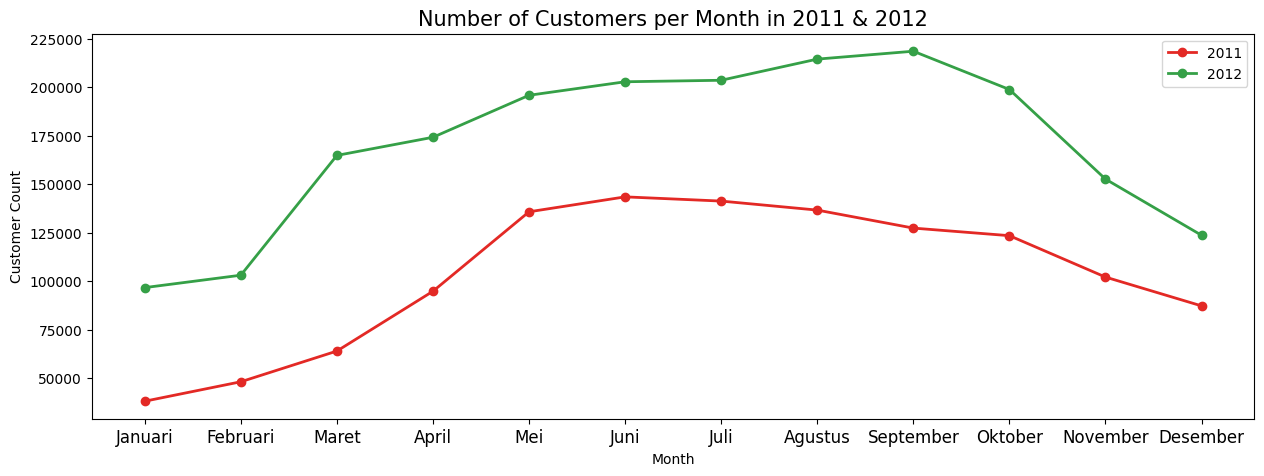

In [34]:
plt.figure(figsize=(15, 5))

plt.plot(
    month_df["month"],
    month_df["customer_count"],
    marker='o',
    linewidth=2,
    color="#E32925",
    label="2011"
)
plt.plot(
    bymonth_df["month"],
    bymonth_df["customer_count"],
    marker='o',
    linewidth=2,
    color="#35A047",
    label="2012"
)
plt.title("Number of Customers per Month in 2011 & 2012", loc="center", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Customer Count")
plt.xlabel("Month")
plt.tick_params(axis='x', labelsize=12)
plt.legend()
plt.show()


### Pertanyaan 3: Bagaimana tingkat penyewaan sepeda dalam 24 jam?

In [35]:
byhour_df = split_df.groupby(by="hr").cnt.sum().reset_index()
byhour_df['hr'].replace({
    0: '00.00',
    1: '01.00',
    2: '02.00',
    3: '03.00',
    4: '04.00',
    5: '05.00',
    6: '06.00',
    7: '07.00',
    8: '08.00',
    9: '09.00',
    10: '10.00',
    11: '11.00',
    12: '12.00',
    13: '13.00',
    14: '14.00',
    15: '15.00',
    16: '16.00',
    17: '17.00',
    18: '18.00',
    19: '19.00',
    20: '20.00',
    21: '21.00',
    22: '22.00',
    23: '23.00',
}, inplace=True)
byhour_df.rename(columns={
    "cnt": "customer_count",
     "hr": "hour",
}, inplace=True)
byhour_df

,hour,customer_count
0,00.00,15540
1,01.00,9558
2,02.00,6661
3,03.00,3441
4,04.00,1817
5,05.00,5157
6,06.00,20801
7,07.00,56930
8,08.00,95467
9,09.00,59486


In [36]:
hours_df = filtered_df.groupby(by="hr").cnt.sum().reset_index()
hours_df['hr'].replace({
    0: '00.00',
    1: '01.00',
    2: '02.00',
    3: '03.00',
    4: '04.00',
    5: '05.00',
    6: '06.00',
    7: '07.00',
    8: '08.00',
    9: '09.00',
    10: '10.00',
    11: '11.00',
    12: '12.00',
    13: '13.00',
    14: '14.00',
    15: '15.00',
    16: '16.00',
    17: '17.00',
    18: '18.00',
    19: '19.00',
    20: '20.00',
    21: '21.00',
    22: '22.00',
    23: '23.00',
}, inplace=True)
hours_df.rename(columns={
    "cnt": "customer_count",
     "hr": "hour",
}, inplace=True)
hours_df

,hour,customer_count
0,00.00,23590
1,01.00,14606
2,02.00,9691
3,03.00,4733
4,04.00,2611
5,05.00,9104
6,06.00,34331
7,07.00,97241
8,08.00,165534
9,09.00,99952


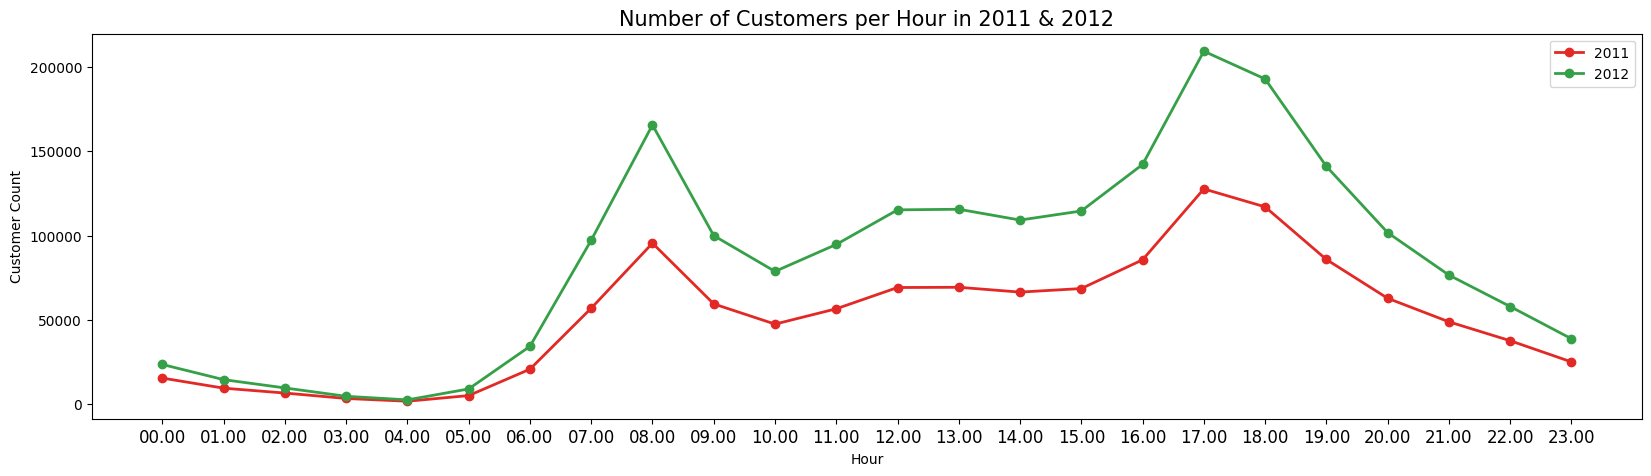

In [37]:
plt.figure(figsize=(20, 5))

plt.plot(
    byhour_df["hour"],
    byhour_df["customer_count"],
    marker='o',
    linewidth=2,
    color="#E32925",
    label="2011"
)
plt.plot(
    hours_df["hour"],
    hours_df["customer_count"],
    marker='o',
    linewidth=2,
    color="#35A047",
    label="2012"
)
plt.title("Number of Customers per Hour in 2011 & 2012", loc="center", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Customer Count")
plt.xlabel("Hour")
plt.tick_params(axis='x', labelsize=12)
plt.legend()
plt.show()

**Insight:**
- Pada musim gugur terjadi penyewaan sepeda tertinggi dibanding musim panas, musim dingin, dan musim semi.
- Penurunan jumlah penyewa sepeda pada musim semi cukup signifikan dibandingkan dengan 3 musim lainnya.
- Pada tahun 2011 transaksi penyewaan sepeda terbanyak terjadi pada bulan Juni, sedangka tahun 2012 transaksi terbanyak terjadi pada bulan September
- Jumlah transaksi penyewaan sepeda pada tahun 2012 mengalami peningkatan dibanding tahun 2011
- Jumlah tranksaksi pada bulan Mei-Agustus 2011 terbilang stabil
- Terjadi penurunan transaksi penyewaan sepeda pada awal dan akhir tahun
- Pada 6 bulan partama tahun 2011 dan 2012, jumlah transaksi penyewaan sepeda terus mengalami peningkatan
- Jumlah transaksi penyewaan sepeda terbanyak terjadi pada pukul 17.00, 18.00, dan 08.00 pagi.
- Transaksi paling sedikit terjadi pada pukul 04.00 pagi tiap tahunnya
- Waktu pulang atau bukan Waktu kerja, yaitu rentang 18.00 - 04.00 terjadi penurunan jumlah penyewaan sepeda


## Analisis Lanjutan: Clustering

In [38]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
bywindspeed_df = hour_df.groupby(by="windspeed").cnt.sum().reset_index()

def categorize_windspeed(windspeed):
    if 0.0 <= windspeed <= 0.0149:
        return 'Calm'
    elif 0.0149 < windspeed <= 0.0448:
        return 'Light Air'
    elif 0.0448 < windspeed <= 0.1045:
        return 'Light Breeze'
    elif 0.1045 < windspeed <= 0.1791:
        return 'Gentle Breeze'
    elif 0.1791 < windspeed <= 0.2686:
        return 'Moderate Breeze'
    elif 0.2686 < windspeed <= 0.3582:
        return 'Fresh Breeze'
    elif 0.3582 < windspeed <= 0.4627:
        return 'Strong Breeze'
    elif 0.4627 < windspeed <= 0.5672:
        return 'Moderate Gale'
    elif 0.5672 < windspeed <= 0.6866:
        return 'Fresh Gale'
    elif 0.6866 < windspeed <= 0.806:
        return 'Strong Gale'
    elif 0.806 < windspeed <= 0.9403:
        return 'Whole Gale'
    elif 0.9403 < windspeed <= 1.075:
        return 'Violent Storm'
    else:
        return 'Unknown'

bywindspeed_df['windspeed_category'] = bywindspeed_df['windspeed'].apply(categorize_windspeed)
bywindspeed_grouped = bywindspeed_df.groupby(by="windspeed_category").cnt.sum().reset_index()
bywindspeed_grouped.rename(columns={
    "cnt": "customer_count",
}, inplace=True)

bywindspeed_grouped


,windspeed_category,customer_count
0,Calm,350203
1,Fresh Breeze,614953
2,Fresh Gale,15628
3,Gentle Breeze,639421
4,Light Breeze,482625
5,Moderate Breeze,929965
6,Moderate Gale,44875
7,Strong Breeze,213601
8,Strong Gale,853
9,Whole Gale,555


In [40]:
bywindspeed_grouped.head()

,windspeed_category,customer_count
0,Calm,350203
1,Fresh Breeze,614953
2,Fresh Gale,15628
3,Gentle Breeze,639421
4,Light Breeze,482625


<ipython-input-41-407e484d989f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


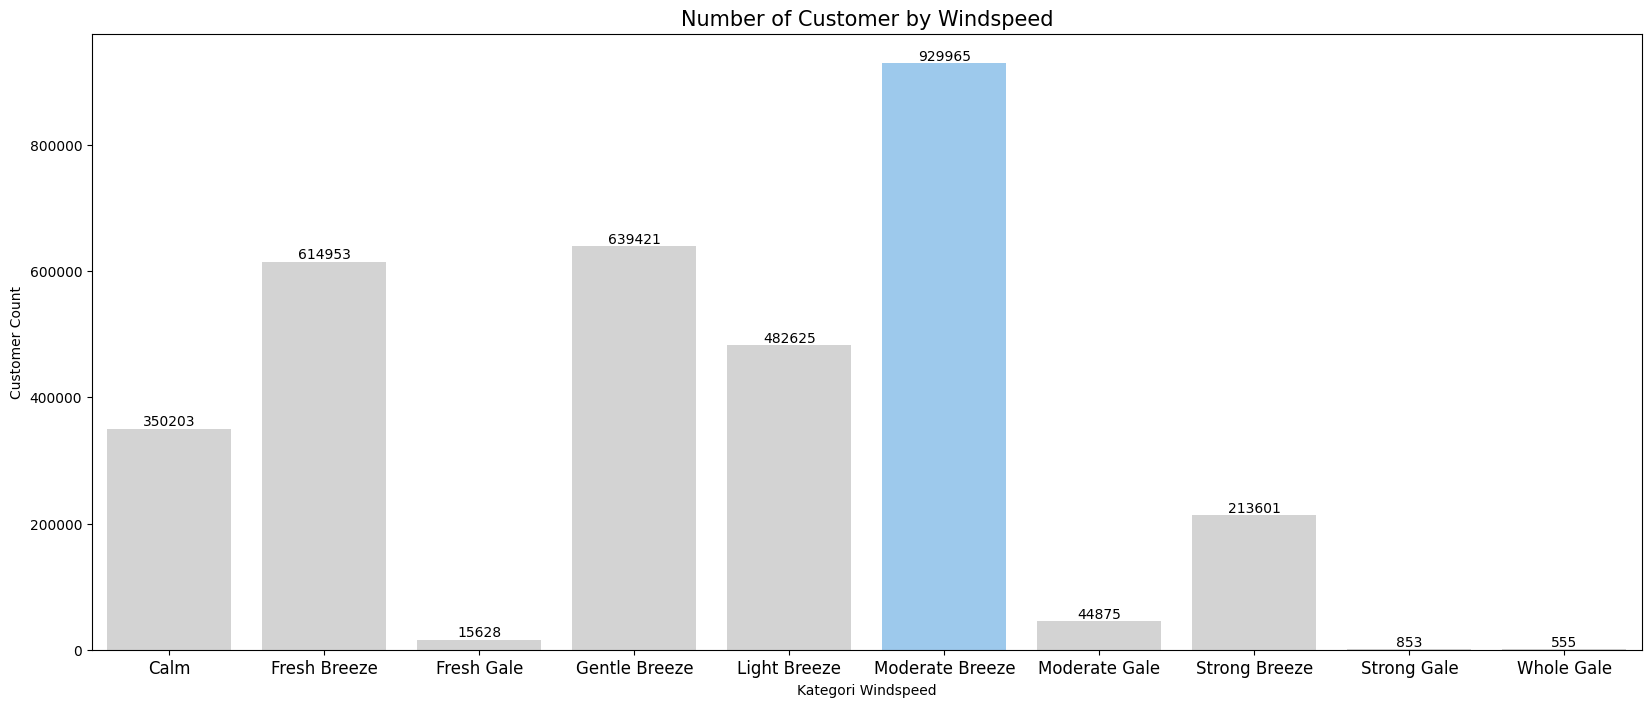

In [41]:
plt.figure(figsize=(20, 8))

color_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3"]
bar_plot = sns.barplot(
    x = bywindspeed_grouped['windspeed_category'],
    y = bywindspeed_grouped['customer_count'],
    data=bywindspeed_grouped.sort_values(by="customer_count", ascending=False),
    palette=color_

)

for patch in bar_plot.patches:
    height = patch.get_height()
    bar_plot.text(patch.get_x() + patch.get_width() / 2.0, height + 0.5, f'{height:.0f}', ha='center', va='bottom')

plt.title("Number of Customer by Windspeed", loc="center", fontsize=15)
plt.ylabel("Customer Count")
plt.xlabel("Kategori Windspeed")
plt.tick_params(axis='x', labelsize=12)
plt.show()


**Insight:**
- Kecepatan angin tidak memengaruhi transaksi penyewaan sepeda terbukti dari hasil visualisasi dimana untuk setiap kategori kecepatan angin dari calm hingga whole gale memiliki jumlah penyewaan yang bervariasi dan tidak memiliki pola

## Conclusion

- Penyewaan sepeda tertinggi terjadi pada musim gugur karena cuaca yang sejuk dan ideal untuk bersepeda dengan pemandangan alam yang indah, diikuti oleh liburan musim panas yang Panjang, membuat Sebagian orang memilih bermobilitas menggunakan sepeda. Walau cuaca dingin, jumlah penyewa sepeda pada musim dingin jauh lebih banyak dibanding musim semi, hal ini mungkin disebabkan perubahan suhu dan cuaca yang tidak menentu seperti hujan pada musim semi membuat orang jadi malas beraktivitas diluar ruangan menggunakan sepeda

- Penyewaan sepeda terbanyak terjadi pada bulan Juni di tahun 2011 dan pada bulan September pada tahun 2012 hal ini berkaitan dengan siklus musim gugur yang terjadi pada rentang Waktu tersebut yang merupakan musim tertinggi terjadinya penyewaan sepeda. Begitu juga dengan penurunan penyewaan sepeda pada awal akhir tahun yang merupakan rentang terjadinya musim dingin dan musim semi. Penyewaan sepeda mengalami peningkatan yang cukup signifikan dalam dua tahun yang berarti terdapat potensi pertumbuhan transportasi sepeda yang mendukung kelestarian lingkungan dan Kesehatan masyarakat

- Jumlah transaksi terbanyak terjadi saat jam masuk dan pulang kerja, hal ini mungkin disebabkan karena Sebagian besar penyewa sepeda merupakan orang yang beraktivitas di hari kerja seperti karyawan, mahasiswa, atau pelajar

- Walaupun musim memengaruhi jumlah transaksi penyewaan sepeda namun kecepatan angin tidak memengaruhi jumlah transaksi penyewaan sepeda, hal ini menandakan bahwa penyewa sepeda tidak mempermasalahkan kondisi angin selagi tidak membahayakan dan masih bisa dilalui.